In [2]:
import numpy as np
import pandas as pd
import timeit
%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


# Data


### Consider a particle at the center of a cube. Our new features are the density of the eight small cubes surrounding the particle as shown below for different cube sizes. 

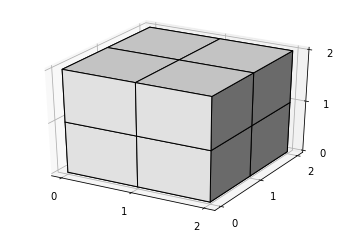

In [67]:
import matplotlib.pyplot as plt

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
x, y, z = np.indices((2, 2, 2))
cube1 = (x < 2) & (y < 2) & (z < 2)
voxels = cube1 
colors = np.empty(voxels.shape, dtype=object)
colors[cube1] = 'white'
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
ax.set_zticks([0, 1, 2])
plt.show()

In [3]:
# data = pd.read_csv(r'/Users/erfan/Desktop/ML/project code/oriented/all Features.csv') 
data = pd.read_csv(r'/Users/erfan/Desktop/all Features5.csv') 
data = data.sort_values( by =['In_halo'])
print(data)

             id  In_halo  den0.8=000  den0.8=001  den0.8=010  den0.8=011  \
99999   8515391        0    0.002344   -0.052164   -0.006741    0.029598   
85606  13856136        0   -0.006741   -0.012797   -0.009769   -0.006741   
50941  11181621        0   -0.046108   -0.015825   -0.018854   -0.037023   
85607  15673120        0    0.005372    0.023542   -0.009769   -0.009769   
50939   8780537        0    0.026570    0.017485   -0.012797   -0.009769   
50938  11040274        0    0.002344    0.005372   -0.033995   -0.000684   
50937  15924751        0   -0.037023   -0.009769   -0.012797    0.023542   
85605   1541507        0    0.020513   -0.030967   -0.024910   -0.015825   
85608  10632717        0   -0.046108   -0.037023   -0.024910   -0.043079   
85610  12512844        0    0.002344   -0.030967   -0.030967   -0.021882   
50932  10800836        0    0.002344   -0.003712    0.029598    0.038683   
50931  14563467        0   -0.015825    0.002344   -0.015825   -0.015825   
50930  14293

In [4]:
data.reset_index(drop=True, inplace=True)
d=data[data.index >= 40000]
d.reset_index(drop=True, inplace=True)
d = d.sort_values( by =['id'])
d.reset_index(drop=True, inplace=True)
print(d)
print(np.sum(d['In_halo']))

             id  In_halo  den0.8=000  den0.8=001  den0.8=010  den0.8=011  \
0        194049        0    0.011429   -0.027938   -0.030967   -0.046108   
1        194288        0   -0.003712   -0.003712   -0.021882   -0.000684   
2        194327        0    0.002344    0.014457   -0.021882   -0.027938   
3        194407        0   -0.006741    0.008400   -0.012797    0.008400   
4        194428        0   -0.009769   -0.015825   -0.015825    0.011429   
5        194451        0    0.008400    0.008400    0.002344    0.005372   
6        194685        1    0.017485    0.014457    0.020513    0.038683   
7        194778        0    0.005372    0.011429    0.032626   -0.021882   
8        194982        0   -0.006741    0.008400    0.038683    0.005372   
9        195033        0    0.023542    0.011429    0.008400   -0.009769   
10       195218        0    0.014457    0.011429    0.044739   -0.003712   
11       195281        0    0.008400   -0.000684    0.014457   -0.024910   
12       195

In column names the first number is the cube  half-edge size and the three numbers at the end are used to specify the eight diffrent cubes.

In [68]:
d.head()

,id,In_halo,den0.8=000,den0.8=001,den0.8=010,den0.8=011,den0.8=100,den0.8=101,den0.8=110,den0.8=111,...,den1.4=110,den1.4=111,den1.6=000,den1.6=001,den1.6=010,den1.6=011,den1.6=100,den1.6=101,den1.6=110,den1.6=111
0,194049,0,0.011429,-0.027938,-0.030967,-0.046108,-0.003712,-0.046108,-0.009769,-0.015825,...,-0.010060,-0.009495,0.000830,-0.014690,-0.004469,-0.025667,-0.023774,-0.039294,-0.012040,-0.008255
1,194288,0,-0.003712,-0.003712,-0.021882,-0.000684,0.014457,-0.030967,0.002344,-0.000684,...,-0.013450,0.000110,0.007643,-0.013554,-0.000306,-0.009769,-0.016961,-0.035130,-0.009769,0.004615
2,194327,0,0.002344,0.014457,-0.021882,-0.027938,0.011429,-0.012797,0.017485,0.017485,...,-0.006105,-0.014015,-0.000684,-0.012419,0.013321,-0.009769,-0.013933,-0.039673,-0.005984,-0.013176
3,194407,0,-0.006741,0.008400,-0.012797,0.008400,-0.000684,0.023542,-0.021882,-0.015825,...,0.006891,-0.011190,0.003480,-0.007498,0.021270,0.001208,-0.007876,-0.027181,0.001965,-0.006362
4,194428,0,-0.009769,-0.015825,-0.015825,0.011429,-0.000684,-0.012797,-0.006741,-0.006741,...,0.005196,-0.003845,0.006129,0.000073,0.011050,-0.001063,-0.002198,-0.023396,0.001208,-0.002955


In [5]:
d.describe()

,id,In_halo,den0.8=000,den0.8=001,den0.8=010,den0.8=011,den0.8=100,den0.8=101,den0.8=110,den0.8=111,...,den1.4=110,den1.4=111,den1.6=000,den1.6=001,den1.6=010,den1.6=011,den1.6=100,den1.6=101,den1.6=110,den1.6=111
count,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,9.687501e+06,0.469333,0.004685,0.004187,0.005044,0.004395,0.004893,0.004394,0.005194,0.004830,...,0.004218,0.003429,0.003053,0.002134,0.003432,0.002762,0.003445,0.002555,0.003873,0.003040
std,5.499848e+06,0.499063,0.030237,0.030332,0.030454,0.030301,0.030282,0.030335,0.030335,0.030374,...,0.021217,0.021191,0.019600,0.019653,0.019663,0.019684,0.019358,0.019405,0.019523,0.019502
min,1.940490e+05,0.000000,-0.109700,-0.118785,-0.121813,-0.112729,-0.109700,-0.109700,-0.115757,-0.121813,...,-0.076734,-0.078994,-0.070333,-0.069576,-0.074497,-0.068062,-0.075633,-0.068062,-0.070333,-0.072605
25%,5.018232e+06,0.000000,-0.015825,-0.015825,-0.015825,-0.015825,-0.015825,-0.015825,-0.015825,-0.015825,...,-0.010060,-0.010625,-0.010147,-0.011283,-0.009769,-0.010526,-0.009769,-0.010526,-0.009390,-0.010147
50%,9.221908e+06,0.000000,0.005372,0.005372,0.005372,0.005372,0.005372,0.005372,0.005372,0.005372,...,0.004066,0.002936,0.003101,0.002344,0.003480,0.002723,0.003480,0.002723,0.003858,0.002723
75%,1.461420e+07,1.000000,0.026570,0.023542,0.026570,0.023542,0.026570,0.023542,0.026570,0.026570,...,0.018756,0.017626,0.016350,0.015593,0.016728,0.015971,0.016728,0.015971,0.017107,0.016350
max,1.948878e+07,1.000000,0.129530,0.120445,0.138614,0.132558,0.129530,0.132558,0.159812,0.153756,...,0.103512,0.096731,0.074643,0.080321,0.086756,0.091298,0.075022,0.071236,0.095462,0.089406


In [6]:
X, Y = d.iloc[:,2:], d['In_halo']
print(X)
print(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

       den0.8=000  den0.8=001  den0.8=010  den0.8=011  den0.8=100  den0.8=101  \
0        0.011429   -0.027938   -0.030967   -0.046108   -0.003712   -0.046108   
1       -0.003712   -0.003712   -0.021882   -0.000684    0.014457   -0.030967   
2        0.002344    0.014457   -0.021882   -0.027938    0.011429   -0.012797   
3       -0.006741    0.008400   -0.012797    0.008400   -0.000684    0.023542   
4       -0.009769   -0.015825   -0.015825    0.011429   -0.000684   -0.012797   
5        0.008400    0.008400    0.002344    0.005372   -0.012797    0.029598   
6        0.017485    0.014457    0.020513    0.038683   -0.006741    0.005372   
7        0.005372    0.011429    0.032626   -0.021882   -0.000684   -0.049136   
8       -0.006741    0.008400    0.038683    0.005372   -0.006741    0.011429   
9        0.023542    0.011429    0.008400   -0.009769    0.005372   -0.049136   
10       0.014457    0.011429    0.044739   -0.003712   -0.027938   -0.009769   
11       0.008400   -0.00068

45000
15000
60000


In [7]:
#converting the dataframes to numpy arrays

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)



# Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=9, random_state=0)

%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)
%t Y_predict_rf = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))


708 ms ± 6.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.7 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15000
7201


***Training time = $700 ms$***

***Prediction time= $15 ms$***


In [10]:
#Over all classification report
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_rf)
print(clf_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7983
           1       0.79      0.81      0.80      7017

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



#  Validation curve

## Fine Tuning the model:

We should fine tune our model to get the best estimation for this purpose we need to find our hyperparameters.

Important hyperparameters of random forests includes:

max_depth = max number of levels in each decision tree

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

min_samples_split = min number of data points placed in a node before the node is split



## max_depth

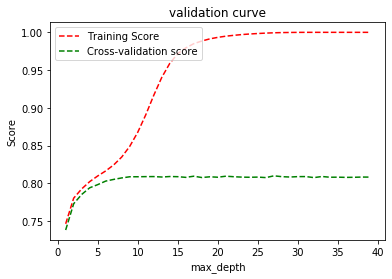

In [130]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt


param_range = np.arange(1, 40, 1)

train_scores, test_scores = validation_curve(
    classifier, X=X, y=Y,cv=5, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

## n_estimators

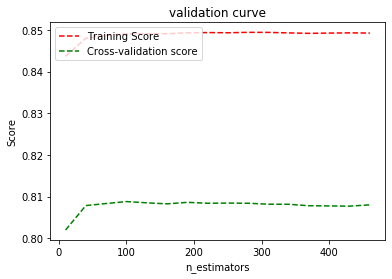

In [131]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt


param_range = np.arange(10, 490, 30)

train_scores, test_scores = validation_curve(
    classifier, X=X, y=Y,cv=5, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

## max_features

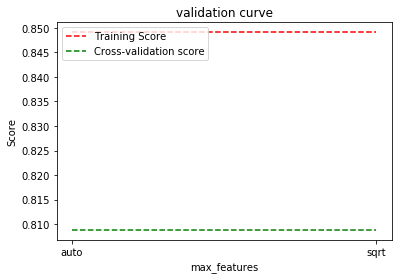

In [134]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt


param_range = ['auto', 'sqrt']

train_scores, test_scores = validation_curve(
    classifier, X=X, y=Y,cv=5, param_name="max_features", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

## min_samples_split

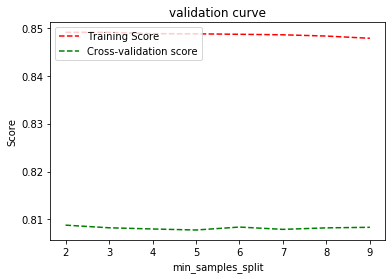

In [133]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt


param_range =  np.arange(2, 10, 1)

train_scores, test_scores = validation_curve(
    classifier, X=X, y=Y,cv=5, param_name="min_samples_split", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

The best fitting is as found above like this:

{'max_depth': 9, 'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'auto', }

Now with these optimal values we can use learning curves for estimating the appropriate training size.

# Learning Curve

In [11]:
#first we should do the classification with the optimal values.

classifier = RandomForestClassifier(max_depth = 9, random_state=0)


from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,49000,3000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

            0         1         2         3         4
0   0.975000  0.983000  0.983000  0.983000  0.983000
1   0.932250  0.942500  0.942500  0.942500  0.942500
2   0.909286  0.912857  0.912857  0.912857  0.912857
3   0.890300  0.896000  0.896000  0.896000  0.896000
4   0.870231  0.885385  0.881615  0.881615  0.881615
5   0.859062  0.883188  0.878250  0.878250  0.878250
6   0.848895  0.866895  0.868053  0.868053  0.868053
7   0.848318  0.865955  0.862045  0.862045  0.862045
8   0.851920  0.865440  0.843320  0.850520  0.850520
9   0.848643  0.863464  0.837357  0.845071  0.845071
10  0.849806  0.862032  0.840548  0.837419  0.837419
11  0.849206  0.860500  0.840618  0.840853  0.839324
12  0.842649  0.856000  0.834838  0.847622  0.839351
13  0.843200  0.852700  0.834250  0.846025  0.841225
14  0.844791  0.854233  0.835953  0.845860  0.841186
15  0.845413  0.852891  0.836261  0.844783  0.839804

Validation scores:

            0         1         2         3         4
0   0

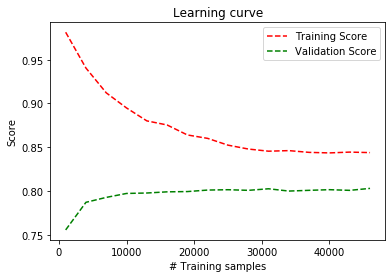

In [15]:
import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis = 1)
# print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
# print(validation_scores_mean)

plt.title('Learning curve')
plt.plot(ns_list, train_scores_mean,'r--',label = 'Training Score')
plt.plot(ns_list, validation_scores_mean, 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

This learning curve shows us that the good sample size which reduce the overfitting and has a high score is around #training sample = 35000.
we see a bit of bias in the results as can be figured out from the difference between validation score and training score.

Now we should do the train with this number of samples:

# Tuning model with new values

In [16]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , train_size = 35000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

35000
25000
60000


In [17]:
classifier = RandomForestClassifier(max_depth = 9,n_estimators=100, random_state=0)

%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)
%t Y_predict_rf = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))

6.28 s ± 780 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
253 ms ± 6.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25000
12198


In [18]:
#Evaluating the new trained model:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_rf)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     13334
           1       0.79      0.82      0.80     11666

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



## Feature Importance:

Random forests give us a great tool to estimate the importance of the each feature that we ae using in the classification problem and this task will give us quite great physical explanation of the most important features in our problem.

Here we computed the feature importances in this problem:

In [19]:
importance = classifier.feature_importances_
print(importance)

[0.01580375 0.01599204 0.01798882 0.01268539 0.01260828 0.01864361
 0.01182918 0.01026461 0.02954775 0.03707895 0.05855526 0.02688183
 0.01891905 0.04136551 0.05003135 0.03794248 0.02655903 0.0246371
 0.04285306 0.02402269 0.0384029  0.04415184 0.04654841 0.04287198
 0.02090712 0.01858194 0.02881604 0.01936382 0.01644697 0.02030109
 0.03043729 0.01727234 0.01670316 0.0178558  0.01198156 0.01541111
 0.0128638  0.01645367 0.01453131 0.01588813]


A histogram of the importance of densities is also showed below:

No handles with labels found to put in legend.


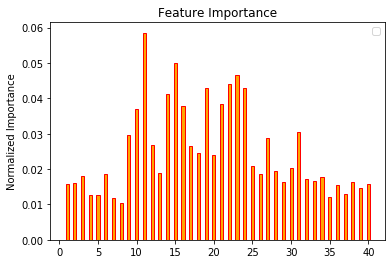

In [20]:
delta = np.arange(1,41,1)
importance = importance

plt.title('Feature Importance')
plt.bar(delta , importance, width = 0.4 , color = 'orange',edgecolor = 'red', capsize =0, linewidth = 1)
#plt.vlines(1.3, 0 , 0.2 , color = 'green', linestyles = 'dashed' , label = "IN-OUT boundary")
#plt.xlabel('$r_c$ of $\delta$ (Mpc)')
plt.ylabel('Normalized Importance')
plt.legend(loc = 'upper right')
plt.show()

## Metrics:
For getting more sense about our classification we can look at the confusion matrix:

### - Confusion matrix

| **True Positive(TP)** || **False Positive(FP)**   |
|------||------|
|   **False Negative(FN)**   || **True Negative(TN)**|


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_rf)
print('Here is the confusion matrix for the LG classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')


Here is the confusion matrix for the LG classifier: 

TP = 10735   FP = 2599 

FN = 2067   TN = 9599 



Confusion matrix, without normalization
[[10735  2599]
 [ 2067  9599]]
Normalized confusion matrix
[[0.80508475 0.19491525]
 [0.17718155 0.82281845]]


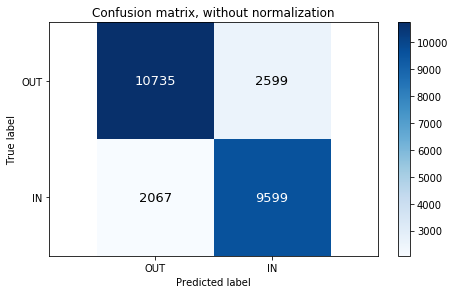

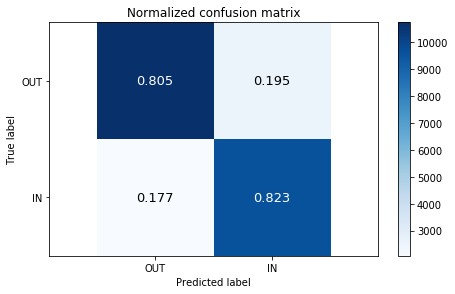

In [22]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

We can read the Acurracy from confusion matrix as well, with following formulation:

### - Acurracy  
$Acurracy = \frac{TP + TN}{TP+TN+FP+FN} * 100$ 

Which means the accuracy is the number of correct prediction on the total training size.

In [23]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 81.336%



### - Precision
The fraction of prediction that we got right = $\frac{TP}{TP+FP}$

### - Recall 
The fraction of the instances that were predicted correctly = $\frac{TP}{TP+FN}$


In [24]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_rf, pos_label=0)
precision = precision_score(Y_test, Y_predict_rf, pos_label = 0)
print(f"recall: \n {round(recall,3)}"  )
print(f"precision: \n {round(precision,3)}"  )

recall: 
 0.805
precision: 
 0.839


### - F1 score

For looking at the precision and recall at the same time we can use the F$\beta$ score of the model which is defined as:

$F\beta_{score} = \frac{(1+\beta^2).precision.recall}{\beta^2 precision+recall}$

we use F1 score for our purpose:

In [25]:
F1 = 2*precision*recall / (precision+recall)
print('The F1 score is : {}'.format(round(F1,3)))

The F1 score is : 0.821


### - Precision - Recall curve

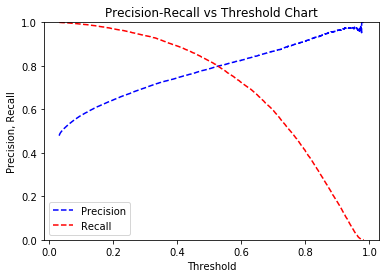

In [26]:
#getting the probability of being in each class from classifier without applying the threshold
Y_probs=classifier.predict_proba(X_test) 
# print(Y_probs)
# print(Y_predict_rf)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

As can be seen increasing precision will result in decrease of the recall and vice versa.
the trade of point between precision and recall is where the two curves coincides which is around the threshold = 0.5 and will result in precision and recalls equal to 0.8.
so the used 0.5 threshold resulted in the best possible performance of the Logisitc Regression model. and there is no need to change it.

### - ROC curve (Receiver operating characteristic)



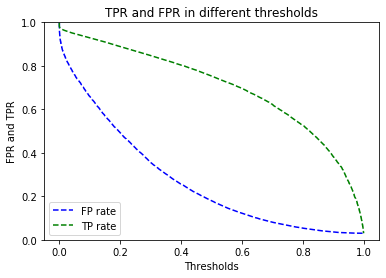

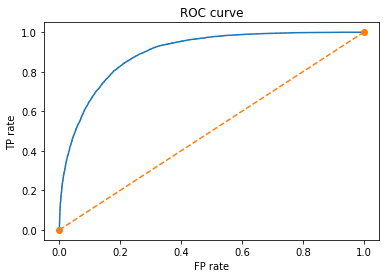

In [27]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probs[:,1])

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()


plt.title('ROC curve')
plt.plot(fpr , tpr)
plt.plot([0, 1], [0, 1] , 'o--')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.show()

The threshold that we choose will result to FPR  around 0.2 and TPR around 0.8 which again seems to be in the best point possible. lower FPRs will result in lower TPRs as well which we do not like!

### - AUC (Area under ROC curve)
also AUC which is the area under the ROC curve can be another measure which will help and it gives an overal measure of the performance of our model over all thresholds. The ideal AUC should be very close to one, but as wee can see the behaviour of our TPR and FPR is in a way that we cannot get this ideal value and the model has divergence from idealized one.
but we cannot tune our model with the help of AUC.

the value of AUC score for our model is:

In [28]:
from sklearn.metrics import roc_auc_score
print('The AUC score  is : {}' .format(round(roc_auc_score(Y_test, Y_probs[:,1]),3)))

The AUC score  is : 0.895


## Overall report:

| *Model* || *Training time* || *prediction time* || *f1 score* || *ROC AUC* || *Accuracy* |
|------||------||------||------||------||------|
| *Random Forest*  || 6 $s$ || 250 $ms$ || 0.821 || 0.895 || 81.336% |